In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("household_power_consumption-Copy1.txt",delimiter=";")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data=data.dropna()

In [4]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1-1-2010,00:00:00,1.790,0.236,240.650,7.400,0.000,0.000,18.0
1,1-1-2010,00:01:00,1.780,0.234,240.070,7.400,0.000,0.000,18.0
2,1-1-2010,00:02:00,1.780,0.234,240.150,7.400,0.000,0.000,19.0
3,1-1-2010,00:03:00,1.746,0.186,240.260,7.200,0.000,0.000,18.0
4,1-1-2010,00:04:00,1.686,0.102,240.120,7.000,0.000,0.000,18.0
...,...,...,...,...,...,...,...,...,...
475018,26-11-2010,20:58:00,0.946,0,240.43,4,0,0,0.0
475019,26-11-2010,20:59:00,0.944,0,240,4,0,0,0.0
475020,26-11-2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
475021,26-11-2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [5]:
for i in ["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]:
    data[i]=pd.to_numeric(data[i])

In [6]:
np.dtype(data["Voltage"])

dtype('float64')

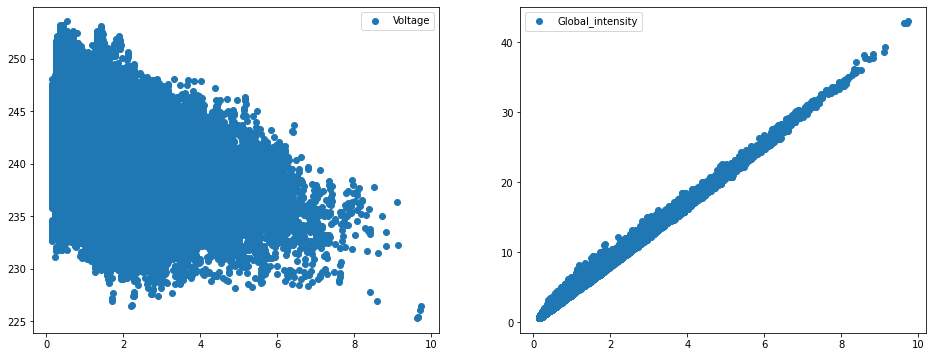

In [7]:
plt.figure(figsize=(16,6))
for i,j in enumerate(["Voltage","Global_intensity"]):
    plt.subplot(1,2,i+1)
    plt.scatter(data["Global_active_power"],data[j],label=j)
    plt.legend()
plt.show()

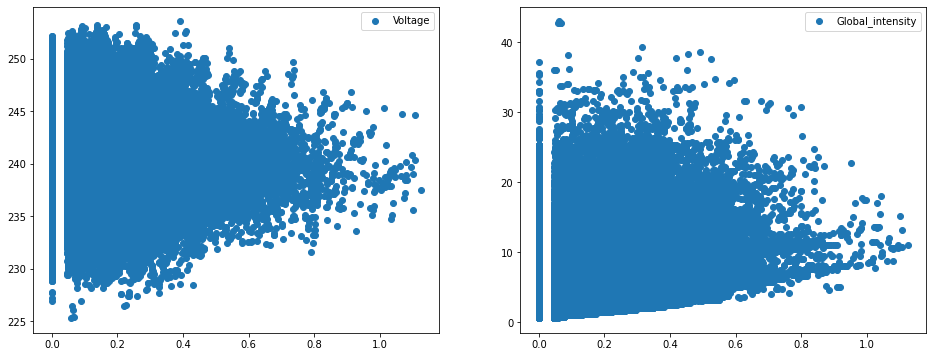

In [8]:
plt.figure(figsize=(16,6))
for i,j in enumerate(["Voltage","Global_intensity"]):
    plt.subplot(1,2,i+1)
    plt.scatter(data["Global_reactive_power"],data[j],label=j)
    plt.legend()
plt.show()

In [9]:
import statsmodels.api as sm
X = data[["Global_intensity"]]
X = sm.add_constant(X)
y = data["Global_active_power"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 1.637e+08
Date:                 Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                         23:12:09   Log-Likelihood:             7.2808e+05
No. Observations:               457395   AIC:                        -1.456e+06
Df Residuals:                   457393   BIC:                        -1.456e+06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0050   

In [10]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1-1-2010,00:00:00,1.790,0.236,240.65,7.4,0.0,0.0,18.0
1,1-1-2010,00:01:00,1.780,0.234,240.07,7.4,0.0,0.0,18.0
2,1-1-2010,00:02:00,1.780,0.234,240.15,7.4,0.0,0.0,19.0
3,1-1-2010,00:03:00,1.746,0.186,240.26,7.2,0.0,0.0,18.0
4,1-1-2010,00:04:00,1.686,0.102,240.12,7.0,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...
475018,26-11-2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
475019,26-11-2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
475020,26-11-2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
475021,26-11-2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [11]:
data["Datetime"]=pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [12]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,1-1-2010,00:00:00,1.790,0.236,240.65,7.4,0.0,0.0,18.0,2010-01-01 00:00:00
1,1-1-2010,00:01:00,1.780,0.234,240.07,7.4,0.0,0.0,18.0,2010-01-01 00:01:00
2,1-1-2010,00:02:00,1.780,0.234,240.15,7.4,0.0,0.0,19.0,2010-01-01 00:02:00
3,1-1-2010,00:03:00,1.746,0.186,240.26,7.2,0.0,0.0,18.0,2010-01-01 00:03:00
4,1-1-2010,00:04:00,1.686,0.102,240.12,7.0,0.0,0.0,18.0,2010-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...
475018,26-11-2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
475019,26-11-2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
475020,26-11-2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
475021,26-11-2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [15]:
data=data.set_index('Datetime')

In [16]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,,,
2010-01-01 00:00:00,1-1-2010,00:00:00,1.790,0.236,240.65,7.4,0.0,0.0,18.0
2010-01-01 00:01:00,1-1-2010,00:01:00,1.780,0.234,240.07,7.4,0.0,0.0,18.0
2010-01-01 00:02:00,1-1-2010,00:02:00,1.780,0.234,240.15,7.4,0.0,0.0,19.0
2010-01-01 00:03:00,1-1-2010,00:03:00,1.746,0.186,240.26,7.2,0.0,0.0,18.0
2010-01-01 00:04:00,1-1-2010,00:04:00,1.686,0.102,240.12,7.0,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,26-11-2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,26-11-2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,26-11-2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [17]:
data.resample('M').mean()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2010-01-31,1.300640,0.125182,242.338522,5.430332,1.196248,1.137824,9.038161
2010-02-28,1.157539,0.109467,242.002101,4.836624,1.039996,1.193421,8.271560
2010-03-31,1.170015,0.136368,241.475284,4.920399,0.993807,1.593641,8.084497
2010-04-30,1.036334,0.129557,241.442527,4.363496,0.866571,1.021049,7.481777
2010-05-31,1.075957,0.127221,241.296151,4.551504,1.215653,0.897752,7.780134
2010-06-30,0.975306,0.145525,240.888985,4.170282,1.236284,1.057401,6.724347
2010-07-31,0.778947,0.138093,240.965167,3.337202,0.530799,0.932961,4.706868
2010-08-31,0.929452,0.130815,241.422944,3.954423,0.723022,1.036721,6.597376
2010-09-30,0.997541,0.127700,241.267517,4.223837,0.949730,1.017332,6.919119


In [20]:
data_d=data.resample('D').mean()
data_d

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2010-01-01,0.850175,0.114817,242.565722,3.537083,1.600000,0.227083,2.470833
2010-01-02,1.176235,0.086656,243.631743,4.857778,0.771528,0.254861,10.154861
2010-01-03,0.901894,0.090331,241.822778,3.757778,1.239583,0.327083,4.940972
2010-01-04,1.171833,0.100322,241.754160,4.879028,1.236111,0.359028,9.995139
2010-01-05,0.916776,0.133697,240.647167,3.929861,1.377778,3.392361,4.688194
...,...,...,...,...,...,...,...
2010-12-07,0.770538,0.198550,240.218646,3.397222,1.197222,0.448611,4.475000
2010-12-08,0.367846,0.117429,240.794931,1.623750,0.000000,0.356944,2.765278
2010-12-09,1.119508,0.139832,241.619722,4.755694,1.253472,1.444444,6.174306


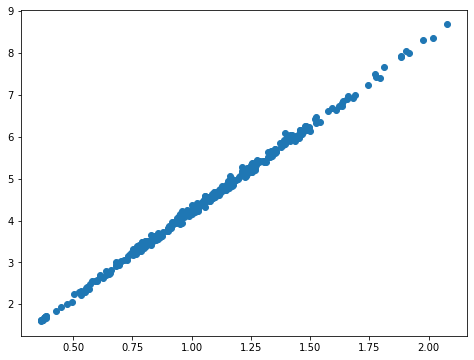

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(data_d["Global_active_power"],data_d["Global_intensity"])
plt.show()